In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from datasets import load_dataset

/remote/csifs1/disk3/users/yama11235/yama11235/visualization/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# データの前処理

### 円環マップ

In [4]:
df = pd.read_csv("../dataset/goemotions_12pac_mapping.csv")

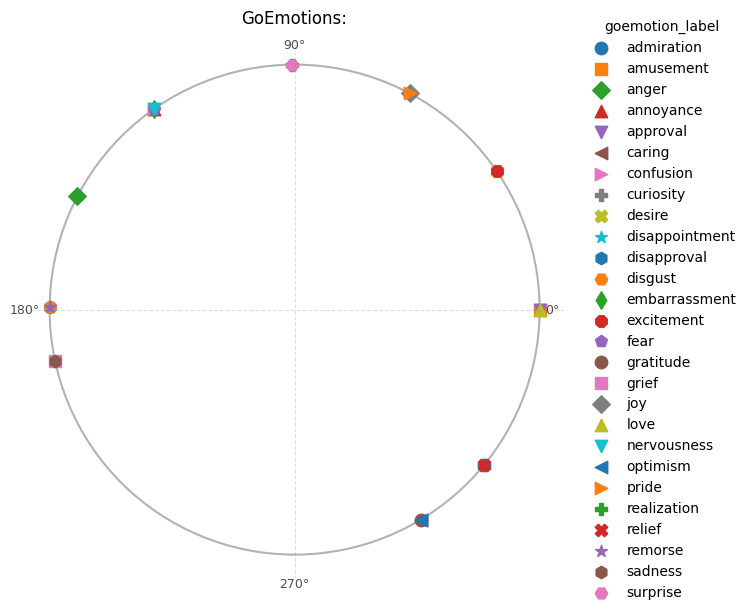

In [9]:
# Validate required columns exist
required_cols = {"goemotion_label", "pac_angle_deg"}
missing = required_cols - set(df.columns)

# === 2) Convert degrees -> radians and to XY on unit circle ===
theta_rad = np.deg2rad(df["pac_angle_deg"].astype(float))
df["x"] = np.cos(theta_rad)
df["y"] = np.sin(theta_rad)

# === 3) Prepare stylistic cycles (different markers/colors) ===
# We'll let matplotlib handle color cycling automatically for distinct colors.
markers = cycle(["o", "s", "D", "^", "v", "<", ">", "P", "X", "*", "h", "H", "d", "8", "p"])

# === 4) Create the plot ===
plt.figure(figsize=(7, 7))

# Draw a transparent (no fill) circle outline
circle = plt.Circle((0, 0), 1.0, fill=False, linewidth=1.5, alpha=0.3)
plt.gca().add_artist(circle)

# Plot each emotion label as a separate legend entry
for (_, row), m in zip(df.iterrows(), markers):
    plt.scatter(row["x"], row["y"], marker=m, s=80, label=row["goemotion_label"])

# Aesthetics
plt.gca().set_aspect("equal", "box")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title("GoEmotions:", pad=12)

# Optional guides for 0/90/180/270 degrees (light dashed axes)
plt.axhline(0, linewidth=0.8, linestyle="--", alpha=0.2)
plt.axvline(0, linewidth=0.8, linestyle="--", alpha=0.2)

# Degree labels around the circle (optional but helpful)
# We'll annotate at 0°, 90°, 180°, 270°
for deg, (x, y) in {
    "0°": (1.05, 0),
    "90°": (0, 1.08),
    "180°": (-1.1, 0),
    "270°": (0, -1.12),
}.items():
    plt.text(x, y, deg, ha="center", va="center", fontsize=9, alpha=0.7)

# Legend using goemotion_label
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), title="goemotion_label", frameon=False)

# Clean axes
plt.xticks([])
plt.yticks([])
plt.box(False)

plt.show()


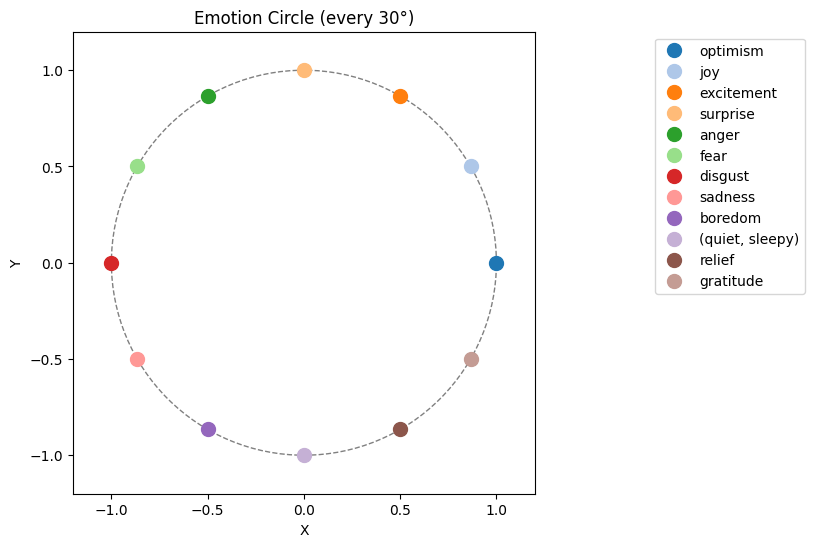

In [60]:
# 角度とラベルの対応表（度単位）
angle_label_map = {
    0: "optimism",
    30: "joy",
    60: "excitement",
    90: "surprise",
    120: "anger",
    150: "fear",
    180: "disgust",
    210: "sadness",
    240: "boredom",
    270: "(quiet, sleepy)",
    300: "relief",
    330: "gratitude",
}

# 円の半径
r = 1.0

color_cycle = cycle(plt.cm.tab20.colors)  # 色とマーカーのリスト（必要に応じて自動的に繰り返し）
# colors = plt.cm.tab12(np.linspace(0, 1, len(angle_label_map)))
markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', '<', '>', 'H', 'd']

# プロット設定
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# 角度ごとに点を描画
for (i, (deg, label)) in enumerate(angle_label_map.items()):
    theta = np.deg2rad(deg)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, marker='o', color=next(color_cycle),
            markersize=10, linestyle='None', label=label)

# 円の外周を描く
circle = plt.Circle((0, 0), r, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)

# 軸設定
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Emotion Circle (every 30°)")

# 凡例
ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()


### GoEmotions

In [16]:
dataset = load_dataset("SetFit/go_emotions")
df_train = pd.DataFrame(dataset['train'])
df_valid = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])
df_train

Repo card metadata block was not found. Setting CardData to empty.


,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
43406,Always thought that was funny but is it a refe...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
43407,What are you talking about? Anything bad that ...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43408,"More like a baptism, with sexy results!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_test.columns

Index(['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval',
       'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
       'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [44]:
for col in df_train.columns[1:]:
    print(col, len(df_train.loc[df_train[col] == 1]))
emotion_cols = df_train.columns[1:]

df_train_single = df_train[df_train[emotion_cols].sum(axis=1) == 1]
df_valid_single = df_valid[df_valid[emotion_cols].sum(axis=1) == 1]
df_test_single = df_test[df_test[emotion_cols].sum(axis=1) == 1]

df_go = pd.DataFrame(columns=['text', 'labels'])
for col in df_train.columns[1:]:
    # colのみが1で、それ以外は0のデータを抽出
    df_subset = df_train_single.loc[df_train_single[col] == 1, ['text']]
    df_subset = df_subset.assign(labels=col)
    df_go = pd.concat([df_go, df_subset], ignore_index=True)
df_go_train = df_go

df_go_valid = pd.DataFrame(columns=['text', 'labels'])
for col in df_valid.columns[1:]:    
    # colのみが1で、それ以外は0のデータを抽出
    df_subset = df_valid_single.loc[df_valid_single[col] == 1, ['text']]
    df_subset = df_subset.assign(labels=col)
    df_go_valid = pd.concat([df_go_valid, df_subset], ignore_index=True)

df_go_test = pd.DataFrame(columns=['text', 'labels'])
for col in df_test.columns[1:]:   
    # colのみが1で、それ以外は0のデータを抽出
    df_subset = df_test_single.loc[df_test_single[col] == 1, ['text']]
    df_subset = df_subset.assign(labels=col)
    df_go_test = pd.concat([df_go_test, df_subset], ignore_index=True)      


admiration 4130
amusement 2328
anger 1567
annoyance 2470
approval 2939
caring 1087
confusion 1368
curiosity 2191
desire 641
disappointment 1269
disapproval 2022
disgust 793
embarrassment 303
excitement 853
fear 596
gratitude 2662
grief 77
joy 1452
love 2086
nervousness 164
optimism 1581
pride 111
realization 1110
relief 153
remorse 545
sadness 1326
surprise 1060
neutral 14219


In [61]:
emotion_labels = ["optimism", "joy",
    "excitement","surprise","anger","fear","disgust",
    "sadness","boredom","relief", "gratitude"]

df_emotion_train = df_go_train.loc[df_go_train['labels'].isin(emotion_labels)]
df_emotion_valid = df_go_valid.loc[df_go_valid['labels'].isin(emotion_labels)]
df_emotion_test = df_go_test.loc[df_go_test['labels'].isin(emotion_labels)]


In [62]:
df_emotion_train['labels'].value_counts()

labels
gratitude     1857
anger         1025
optimism       861
joy            853
sadness        817
surprise       720
excitement     510
disgust        498
fear           430
relief          88
Name: count, dtype: int64

In [63]:
df_cf_train["labels"].value_counts()

labels
relief     828
boredom    105
Name: count, dtype: int64

In [68]:
Train_df = pd.concat([df_emotion_train, df_cf_train], ignore_index=True).drop_duplicates()
Valid_df = pd.concat([df_emotion_valid, df_cf_valid], ignore_index=True).drop_duplicates()
Test_df = pd.concat([df_emotion_test, df_cf_test], ignore_index=True).drop_duplicates()

Train_df

,text,labels
0,WHY THE FUCK IS BAYLESS ISOING,anger
1,Fucking coward.,anger
2,Stupidly stubborn / stubbornly stupid,anger
3,"Troll, bro. They know they're saying stupid sh...",anger
4,The fuck is “mog?!”,anger
...,...,...
8587,I need something t do like hello... Im fucking...,boredom
8588,fml. forgot alli's dance recital is tonight. n...,boredom
8589,Nothing to do. Just sitting here. I can see Mr...,boredom
8590,"bored , cleanin the house",boredom


In [69]:
Train_df["labels"].value_counts()

labels
gratitude     1819
anger         1023
optimism       859
joy            850
relief         828
sadness        816
surprise       718
excitement     508
disgust        497
fear           430
boredom        105
Name: count, dtype: int64

In [70]:
Train_df["length"] = Train_df["text"].apply(lambda x: len(x.split()))
Valid_df["length"] = Valid_df["text"].apply(lambda x: len(x.split()))
Test_df["length"] = Test_df["text"].apply(lambda x: len(x.split()))

Train_df

,text,labels,length
0,WHY THE FUCK IS BAYLESS ISOING,anger,6
1,Fucking coward.,anger,2
2,Stupidly stubborn / stubbornly stupid,anger,5
3,"Troll, bro. They know they're saying stupid sh...",anger,19
4,The fuck is “mog?!”,anger,4
...,...,...,...
8587,I need something t do like hello... Im fucking...,boredom,13
8588,fml. forgot alli's dance recital is tonight. n...,boredom,22
8589,Nothing to do. Just sitting here. I can see Mr...,boredom,14
8590,"bored , cleanin the house",boredom,5


In [80]:
Train_df.groupby("labels")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
anger,1023.0,11.323558,6.868196,1.0,5.0,10.0,17.0,31.0
boredom,105.0,13.238095,6.539119,3.0,8.0,12.0,18.0,31.0
disgust,497.0,12.293763,6.368254,1.0,7.0,12.0,17.0,28.0
excitement,508.0,11.023622,6.672047,1.0,5.0,9.5,16.0,30.0
fear,430.0,13.069767,6.797762,2.0,7.0,13.0,18.0,28.0
gratitude,1819.0,11.158879,6.614195,1.0,5.0,10.0,16.0,30.0
joy,850.0,12.295294,6.532232,1.0,7.0,11.0,17.0,29.0
optimism,859.0,14.976717,6.252788,2.0,10.0,15.0,20.0,29.0
relief,828.0,13.862319,6.739612,1.0,8.0,13.0,19.0,32.0


In [82]:
# Train_dfから"labels"がgratitudeで"length"が8以下のデータを削除
Train_df = Train_df.drop(Train_df[(Train_df["labels"] == "gratitude") & (Train_df["length"] <= 8)].index)
Valid_df = Valid_df.drop(Valid_df[(Valid_df["labels"] == "gratitude") & (Valid_df["length"] <= 8)].index)
Test_df = Test_df.drop(Test_df[(Test_df["labels"] == "gratitude") & (Test_df["length"] <= 8)].index)
Train_df

,text,labels,length
0,WHY THE FUCK IS BAYLESS ISOING,anger,6
1,Fucking coward.,anger,2
2,Stupidly stubborn / stubbornly stupid,anger,5
3,"Troll, bro. They know they're saying stupid sh...",anger,19
4,The fuck is “mog?!”,anger,4
...,...,...,...
8587,I need something t do like hello... Im fucking...,boredom,13
8588,fml. forgot alli's dance recital is tonight. n...,boredom,22
8589,Nothing to do. Just sitting here. I can see Mr...,boredom,14
8590,"bored , cleanin the house",boredom,5


In [84]:
Train_df = Train_df[["text", "labels"]].reset_index(drop=True)
Valid_df = Valid_df[["text", "labels"]].reset_index(drop=True)
Test_df = Test_df[["text", "labels"]].reset_index(drop=True)

In [86]:
Train_df.to_csv("../dataset/Train_df.csv", index=False)
Valid_df.to_csv("../dataset/Valid_df.csv", index=False)
Test_df.to_csv("../dataset/Test_df.csv", index=False)

In [2]:
train_df = pd.read_csv("../dataset/Train_df.csv")
valid_df = pd.read_csv("../dataset/Valid_df.csv")
test_df = pd.read_csv("../dataset/Test_df.csv")

In [3]:
train_df.rename(columns={"labels": "sentiment"}, inplace=True)
valid_df.rename(columns={"labels": "sentiment"}, inplace=True)
test_df.rename(columns={"labels": "sentiment"}, inplace=True)

train_df.to_csv("../dataset/sentiment_train_df.csv", index=False)
valid_df.to_csv("../dataset/sentiment_valid_df.csv", index=False)
test_df.to_csv("../dataset/sentiment_test_df.csv", index=False)

In [ ]:
angle_label_map = {
    "optimism": 0,
    "joy": 30,
    "excitement": 60,
    "surprise": 90,
    "anger": 120,
    "fear": 150,
    "disgust": 180,
    "sadness": 210,
    "boredom": 240,
    "sleepy": 270,
    "relief": 300,
    "gratitude": 330,
}


### super emotion

In [3]:
dataset = load_dataset("cirimus/super-emotion")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'labels_str', 'labels_source', 'source'],
        num_rows: 439361
    })
    validation: Dataset({
        features: ['text', 'labels', 'labels_str', 'labels_source', 'source'],
        num_rows: 54835
    })
    test: Dataset({
        features: ['text', 'labels', 'labels_str', 'labels_source', 'source'],
        num_rows: 58625
    })
})

In [4]:
df_train = pd.DataFrame(dataset["train"])
df_valid = pd.DataFrame(dataset["validation"])
df_test = pd.DataFrame(dataset["test"])
df_train

,text,labels,labels_str,labels_source,source
0,also I was the point person on my companys tr...,[4],[Neutral],[neutral],MELD
1,You mustve had your hands full.,[4],[Neutral],[neutral],MELD
2,That I did. That I did.,[4],[Neutral],[neutral],MELD
3,So lets talk a little bit about your duties.,[4],[Neutral],[neutral],MELD
4,My duties? All right.,[6],[Surprise],[surprise],MELD
...,...,...,...,...,...
439356,You have a #problem? Yes! Can you do #somethin...,[0],[Anger],"[anger, disgust]",SemEval
439357,@andreamitchell said @berniesanders not only d...,[6],[Surprise],"[anticipation, surprise]",SemEval
439358,@isthataspider @dhodgs i will fight this guy! ...,"[0, 5]","[Anger, Sadness]","[anger, disgust, pessimism]",SemEval
439359,i wonder how a guy can broke his penis while h...,[6],[Surprise],[surprise],SemEval


In [5]:
emotion_labels = ["hapiness", "optimism", "joy", "amusement",
    "excitement","surprise","anger","fear","disgust",
    "sadness, grief, remorse","boredom","relief"]
index_list_train = []
index_list_valid = []
index_list_test = []
for label in emotion_labels:
    index_train = df_train[df_train['labels_source'].apply(lambda x: label in x)].index.tolist()
    index_list_train.extend(index_train)
    index_valid = df_valid[df_valid['labels_source'].apply(lambda x: label in x)].index.tolist()
    index_list_valid.extend(index_valid)
    index_test = df_test[df_test['labels_source'].apply(lambda x: label in x)].index.tolist()
    index_list_test.extend(index_test)
index_list_train = list(set(index_list_train))
index_list_valid = list(set(index_list_valid))
index_list_test = list(set(index_list_test))
df_train_subset = df_train.loc[index_list_train].reset_index(drop=True)
df_valid_subset = df_valid.loc[index_list_valid].reset_index(drop=True)
df_test_subset = df_test.loc[index_list_test].reset_index(drop=True)
df_train_subset

,text,labels,labels_str,labels_source,source
0,My duties? All right.,[6],[Surprise],[surprise],MELD
1,No dont I beg of you!,[1],[Fear],[fear],MELD
2,Really?!,[6],[Surprise],[surprise],MELD
3,But then who? The waitress I went out with las...,[6],[Surprise],[surprise],MELD
4,"No-no-no-no, no! Who, who were you talking about?",[6],[Surprise],[surprise],MELD
...,...,...,...,...,...
242694,.@Travelanswerman: The possibilities R endless...,[2],[Joy],"[anticipation, joy, optimism]",SemEval
242695,You have a #problem? Yes! Can you do #somethin...,[0],[Anger],"[anger, disgust]",SemEval
242696,@andreamitchell said @berniesanders not only d...,[6],[Surprise],"[anticipation, surprise]",SemEval
242697,@isthataspider @dhodgs i will fight this guy! ...,"[0, 5]","[Anger, Sadness]","[anger, disgust, pessimism]",SemEval


In [8]:
df_train_subset["labels_source"].value_counts()

labels_source
[joy]                                                     121086
[anger]                                                    50343
[fear]                                                     40980
[surprise]                                                 16242
[amusement]                                                 1652
                                                           ...  
[anticipation, disgust, fear, pessimism]                       1
[anger, disgust, optimism, surprise]                           1
[anticipation, disgust, fear, joy, pessimism, sadness]         1
[anger, pessimism, surprise]                                   1
[disgust, optimism, pessimism]                                 1
Name: count, Length: 708, dtype: int64

In [9]:
# NaNを偽（False）扱いにする
df_train_subset.dropna(subset=['labels_source'], inplace=True)
df_train_subset = df_train_subset.astype({'labels_source': str})
df_valid_subset.dropna(subset=['labels_source'], inplace=True)
df_valid_subset = df_valid_subset.astype({'labels_source': str})
df_test_subset.dropna(subset=['labels_source'], inplace=True)
df_test_subset = df_test_subset.astype({'labels_source': str})


In [10]:
df_relief_train = df_train_subset.loc[df_train_subset['labels_source'].str.contains("relief") & ~df_train_subset['text'].str.contains("@")]
df_boredom_train = df_train_subset.loc[df_train_subset['labels_source'].str.contains("boredom") & ~df_train_subset['text'].str.contains("@")]
df_relief_train = df_relief_train[['text', 'labels_source']].rename(columns={'labels_source': 'labels'})
df_relief_train["labels"] = "relief"
df_boredom_train = df_boredom_train[['text', 'labels_source']].rename(columns={'labels_source': 'labels'})
df_boredom_train["labels"] = "boredom"
df_cf_train = pd.concat([df_relief_train, df_boredom_train], ignore_index=True)

df_relief_valid = df_valid_subset.loc[df_valid_subset['labels_source'].str.contains("relief") & ~df_valid_subset['text'].str.contains("@")]
df_boredom_valid = df_valid_subset.loc[df_valid_subset['labels_source'].str.contains("boredom") & ~df_valid_subset['text'].str.contains("@")]
df_relief_valid = df_relief_valid[['text', 'labels_source']].rename(columns={'labels_source': 'labels'})
df_relief_valid["labels"] = "relief"
df_boredom_valid = df_boredom_valid[['text', 'labels_source']].rename(columns={'labels_source': 'labels'})
df_boredom_valid["labels"] = "boredom"
df_cf_valid = pd.concat([df_relief_valid, df_boredom_valid], ignore_index=True)

df_relief_test = df_test_subset.loc[df_test_subset['labels_source'].str.contains("relief") & ~df_test_subset['text'].str.contains("@")]
df_boredom_test = df_test_subset.loc[df_test_subset['labels_source'].str.contains("boredom") & ~df_test_subset['text'].str.contains("@")]
df_relief_test = df_relief_test[['text', 'labels_source']].rename(columns={'labels_source': 'labels'})
df_relief_test["labels"] = "relief"
df_boredom_test = df_boredom_test[['text', 'labels_source']].rename(columns={'labels_source': 'labels'})
df_boredom_test["labels"] = "boredom"
df_cf_test = pd.concat([df_relief_test, df_boredom_test], ignore_index=True)

In [11]:
df_cf_train.to_csv("../dataset/Crowdflower_subset_train.csv", index=False)
df_cf_valid.to_csv("../dataset/Crowdflower_subset_valid.csv", index=False)
df_cf_test.to_csv("../dataset/Crowdflower_subset_test.csv", index=False)

### NRC-VAD

In [41]:
# .txtファイルを読み込む \t区切り
with open('../dataset/NRC-VAD-Lexicon.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    lines = [line.strip().split('\t') for line in lines]    

In [43]:
df_vad = pd.DataFrame(lines[1:], columns=['word', 'valence', 'arousal', 'dominance'])
df_vad

,word,valence,arousal,dominance
0,aaaah,0.04,0.272,-0.436
1,aardvark,-0.146,-0.02,-0.126
2,aback,-0.23,-0.186,-0.424
3,abacus,0.02,-0.448,-0.03
4,abalone,0,-0.04,-0.176
...,...,...,...,...
19965,zoo,0.52,0.04,0.16
19966,zoological,0.334,-0.084,-0.016
19967,zoology,0.136,-0.306,0.018
19968,zoom,-0.02,0.04,-0.076


In [48]:
df_vad['valence'] = df_vad['valence'].astype(float)
df_vad.sort_values('valence', ascending=False)

,word,valence,arousal,dominance
7424,generous,1.000,-0.18,0.62
19203,very positive,1.000,0.102,0.65
10589,magnificent,1.000,0.36,0.772
5921,enjoyable,1.000,-0.038,0.21
8061,happy,1.000,0.47,0.544
...,...,...,...,...
11192,mistreated,-0.980,0.584,-0.6
5071,disheartening,-0.980,-0.294,-0.552
18157,toxic,-0.984,0.77,-0.016
11764,nightmare,-0.990,0.62,-0.128


In [49]:
df_vad['arousal'] = df_vad['arousal'].astype(float)
df_vad.sort_values('arousal', ascending=False)

,word,valence,arousal,dominance
19,abduction,-0.876,0.980,0.346
6253,exorcism,-0.674,0.960,0.114
8454,homicide,-0.980,0.946,0.036
384,aggresive,-0.882,0.942,0.278
17794,terrorism,-0.880,0.942,0.346
...,...,...,...,...
16221,slow,-0.286,-0.854,-0.738
3951,cotton,0.278,-0.858,-0.52
10911,mellow,0.266,-0.862,-0.47
11579,napping,0.530,-0.908,-0.388


In [5]:
for i in range(len(df)):
    emotion_label = df.loc[i, 'goemotion_label']
    for line in lines:
        if line[0] == emotion_label:
            df.loc[i, 'valence'] = float(line[1])
            df.loc[i, 'arousal'] = float(line[2])
            df.loc[i, 'dominance'] = float(line[3])
            break
    

In [14]:
df.to_csv('../dataset/goemotions_12pac_mapping_vad.csv', index=False)

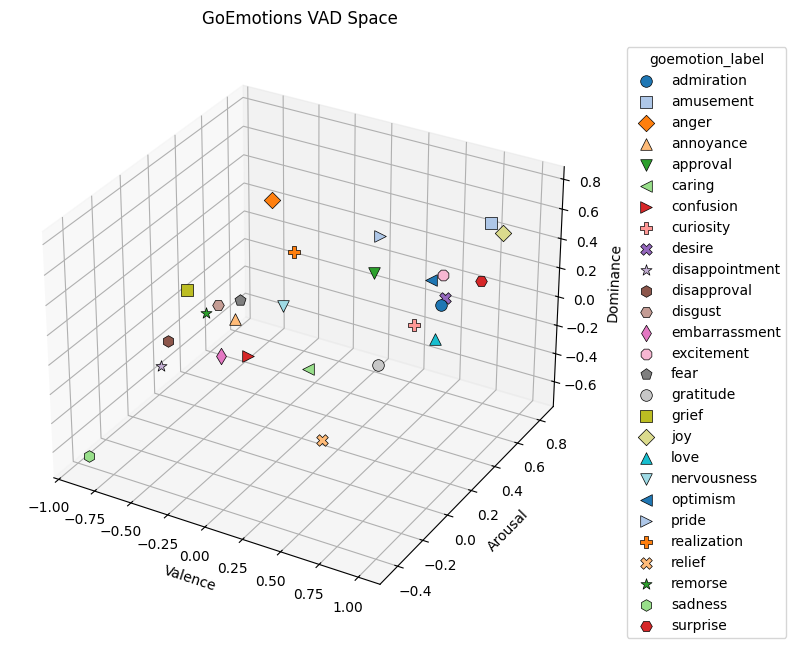

In [6]:
from itertools import cycle

vad_df = pd.read_csv('../dataset/goemotions_12pac_mapping_vad.csv')
labels = vad_df['goemotion_label'].unique()
color_cycle = cycle(plt.cm.tab20.colors)
marker_cycle = cycle(['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', 'h', 'H', 'd', '8', 'p'])

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

for label in labels:
    color = next(color_cycle)
    marker = next(marker_cycle)
    subset = vad_df[vad_df['goemotion_label'] == label]
    ax.scatter(
        subset['valence'],
        subset['arousal'],
        subset['dominance'],
        color=color,
        marker=marker,
        s=70,
        edgecolor='k',
        linewidth=0.5,
        label=label
    )

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.set_title('GoEmotions VAD Space', pad=12)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='goemotion_label')
plt.tight_layout()
plt.show()

In [6]:
vad_df["l2_norm"] = np.sqrt(vad_df["valence"]**2 + vad_df["arousal"]**2 + vad_df["dominance"]**2)
vad_df["va_norm"] = np.sqrt(vad_df["valence"]**2 + vad_df["arousal"]**2)
vad_df

,goemotion_label,pac_sector,pac_name,pac_angle_deg,justification_short,notes,valence,arousal,dominance,l2_norm,va_norm
0,admiration,IV,Deactivated Pleasure,320.5,Respectful/serene positive affect aligns with ...,NaN,0.938,0.166,0.452,1.054374,0.952575
1,amusement,III,Pleasure,0.0,Pleased/amused maps to pure Pleasant (low arou...,NaN,0.858,0.674,0.606,1.248069,1.091073
2,anger,X,Activated Displeasure,152.5,Upset/distressed negative with high activation...,NaN,-0.666,0.730,0.314,1.036847,0.988158
3,annoyance,XI,Unpleasant Activation,125.0,Irritated/jittery negative → Unpleasant Activa...,NaN,-0.666,0.436,-0.316,0.856451,0.796023
4,approval,III,Pleasure,0.0,Satisfaction/pleased corresponds to Pleasure a...,NaN,0.708,-0.080,0.778,1.054964,0.712505
5,caring,V,Pleasant Deactivation,301.0,Warm/affectionate fits Pleasant Deactivation (...,NaN,0.270,-0.062,0.000,0.277027,0.277027
6,confusion,XI,Unpleasant Activation,125.0,Agitated/uncertain tends toward unpleasant act...,NaN,-0.490,0.334,-0.446,0.742005,0.593006
7,curiosity,II,Activated Pleasure,62.0,Attentive/engaged tends to ‘Activated Pleasure...,NaN,0.500,0.510,-0.074,0.718036,0.714213
8,desire,I,Pleasant Activation,34.5,Eager/approach motivation corresponds to Pleas...,NaN,0.792,0.384,0.294,0.927985,0.880182
9,disappointment,IX,Displeasure,179.5,Unhappy/dissatisfied → Displeasure axis.,NaN,-0.770,-0.020,-0.328,0.837188,0.770260


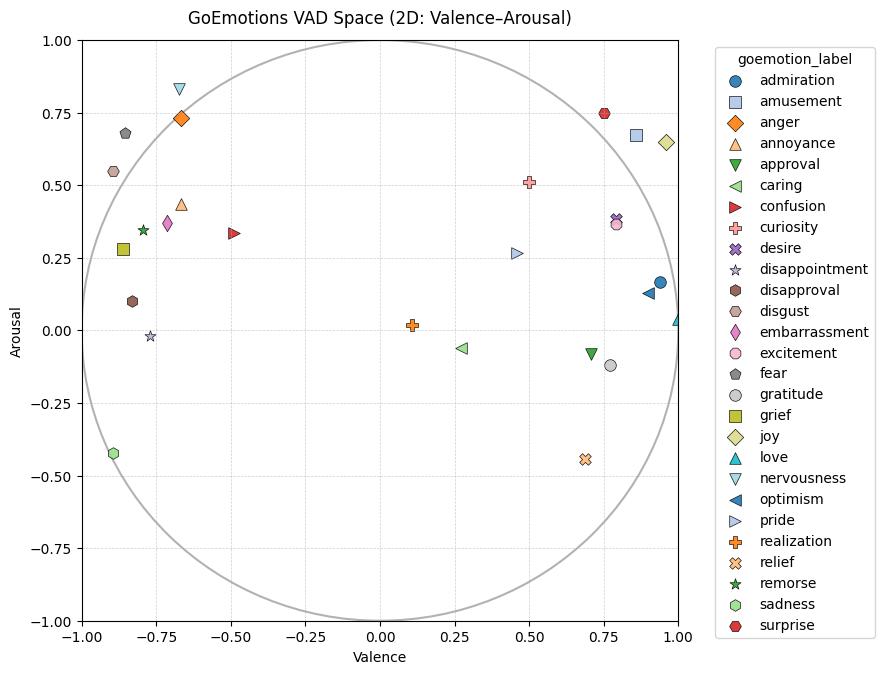

In [10]:
from itertools import cycle
import pandas as pd
import matplotlib.pyplot as plt

vad_df = pd.read_csv('../dataset/goemotions_12pac_mapping_vad.csv')
# vad_df = vad_df.loc[vad_df['goemotion_label'].isin(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])]
labels = vad_df['goemotion_label'].unique()

color_cycle = cycle(plt.cm.tab20.colors)
marker_cycle = cycle(['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', 'h', 'H', 'd', '8', 'p'])

# -1 < x, y < 1グラフを用意する
fig, ax = plt.subplots(figsize=(9, 7))  # ← 2D 軸

# 原点中心、半径1の円を描画
circle = plt.Circle((0, 0), 1.0, fill=False, linewidth=1.5, alpha=0.3)
ax.add_artist(circle)

for label in labels:
    color = next(color_cycle)
    marker = next(marker_cycle)
    subset = vad_df[vad_df['goemotion_label'] == label]
    ax.scatter(
        subset['valence'],
        subset['arousal'],          # ← y は arousal
        color=color,
        marker=marker,
        s=70,
        edgecolor='k',
        linewidth=0.5,
        label=label,
        alpha=0.9                   #（重なり対策に少し透過を入れると見やすい）
    )

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_title('GoEmotions VAD Space (2D: Valence–Arousal)', pad=12)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='goemotion_label')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


In [10]:
vad_df.loc[vad_df['goemotion_label'].isin(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])]

,goemotion_label,pac_sector,pac_name,pac_angle_deg,justification_short,notes,valence,arousal,dominance,l2_norm,va_norm
2,anger,X,Activated Displeasure,152.5,Upset/distressed negative with high activation...,NaN,-0.666,0.730,0.314,1.036847,0.988158
14,fear,XI,Unpleasant Activation,125.0,Anxious/jittery → Unpleasant Activation.,NaN,-0.854,0.680,-0.414,1.167524,1.091657
17,joy,II,Activated Pleasure,62.0,Elated/enthusiastic is canonical ‘Activated Pl...,NaN,0.960,0.648,0.588,1.298941,1.158233
18,love,III,Pleasure,0.0,General ‘love’ (warm liking) sits on Pleasure ...,NaN,1.000,0.038,0.346,1.058848,1.000722
25,sadness,VIII,Deactivated Displeasure,192.0,Sad/gloomy → Deactivated Displeasure.,NaN,-0.896,-0.424,-0.672,1.197571,0.991258
26,surprise,XII,Activation,90.5,High activation with mixed valence; placed on ...,NaN,0.750,0.750,0.124,1.067884,1.060660


In [10]:
# goemotions = load_dataset("mrm8488/goemotions")
goemotions = load_dataset("google-research-datasets/go_emotions")
goemotions

Generating test split: 100%|██████████| 5427/5427 [00:00<00:00, 381792.82 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [38]:
emotion_df = pd.concat([goemotions['train'].to_pandas(), goemotions['validation'].to_pandas(), goemotions['test'].to_pandas()], ignore_index=True)
emotion_df

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
...,...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,[15],efeeasc
54259,Well that makes sense.,[4],ef9c7s3
54260,Daddy issues [NAME],[27],efbiugo
54261,So glad I discovered that subreddit a couple m...,[0],efbvgp9


In [39]:
labels = ['admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']
for i in labels:
    emotion_df[i] = 0
for j in range(len(emotion_df)):
    label_indices = emotion_df.loc[j, 'labels'].tolist()
    # print(type(label_indices))
    # print(label_indices)
    for idx in label_indices:
        emotion_df.loc[j, labels[idx]] = 1
emotion_df

,text,labels,id,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,[27],eebbqej,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,[14],ed7ypvh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,[3],ed0bdzj,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,[15],efeeasc,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54259,Well that makes sense.,[4],ef9c7s3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
54260,Daddy issues [NAME],[27],efbiugo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54261,So glad I discovered that subreddit a couple m...,[0],efbvgp9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
emotion_df = emotion_df[["text", 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']]
for i in emotion_df.columns[1:]:
    sum_val = emotion_df[i].sum()
    print(f"{i}: {sum_val}")

admiration: 5122
amusement: 2895
anger: 1960
annoyance: 3093
approval: 3687
caring: 1375
confusion: 1673
curiosity: 2723
desire: 801
disappointment: 1583
disapproval: 2581
disgust: 1013
embarrassment: 375
excitement: 1052
fear: 764
gratitude: 3372
grief: 96
joy: 1785
love: 2576
nervousness: 208
optimism: 1976
pride: 142
realization: 1382
relief: 182
remorse: 669
sadness: 1625
surprise: 1330
neutral: 17772


### emobank

In [50]:
df = pd.read_csv("../dataset/emobank.csv")
df

,id,split,V,A,D,text
0,110CYL068_1036_1079,train,3.00,3.00,3.20,"Remember what she said in my last letter? """
1,110CYL068_1079_1110,test,2.80,3.10,2.80,If I wasn't working here.
2,110CYL068_1127_1130,train,3.00,3.00,3.00,".."""
3,110CYL068_1137_1188,train,3.44,3.00,3.22,Goodwill helps people get off of public assist...
4,110CYL068_1189_1328,train,3.55,3.27,3.46,Sherry learned through our Future Works class ...
...,...,...,...,...,...,...
10057,wwf12_4531_4624,train,3.00,3.50,3.00,Please let it be a constant reminder of all yo...
10058,wwf12_501_591,train,3.80,3.40,3.60,That’s why I want to extend my appreciation fo...
10059,wwf12_592_691,train,3.00,3.00,3.10,And why I’m writing you today to ask you to re...
10060,wwf12_702_921,train,3.33,3.44,3.44,"In fact, I want to urge you to strengthen your..."


In [53]:
df.sort_values('A', ascending=False)

,id,split,V,A,D,text
8269,detroit_4401_4433,train,2.50,4.40,3.50,DETROIT POLICE ARE WATCHING YOU!
7787,captured_moments_28728_28752,train,4.30,4.40,3.40,"""My God, yes, yes, yes!"""
7949,captured_moments_5506_5538,train,1.30,4.40,3.50,"I hate it, despise it, abhor it!"
9393,littleshelter2_1448_1478,train,4.37,4.37,3.18,Happy Holidays from all of us!
3570,Nathans_Bylichka_22420_22431,train,1.90,4.30,2.90,"“Oh, shit!”"
...,...,...,...,...,...,...
2638,IntroHongKong_1558_1761,test,2.90,2.10,3.30,"But in fact, once news of the handover vanishe..."
9030,hotel-california_29929_29956,train,3.00,2.09,3.00,“I never thought about it.”
10045,wwf12_31_148,dev,3.00,2.00,3.00,"December 7, 2000 FirstName LastName StreetNumb..."
2096,Fermentation_HR5034_14155_14202,train,2.88,1.87,3.00,"arunrob@gmail.com October 13, 2010 at 12:39 PM"
